Базовые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


global_random_seed = 42
np.random.seed(global_random_seed)


##Описание



```
# Выбран кодовый формат
```

**BigQuery-Geotab Intersection Congestion**

The data consists of aggregated trip logging metrics from commercial vehicles, such as semi-trucks. The data have been grouped by intersection, month, hour of day, direction driven through the intersection, and whether the day was on a weekend or not.


**Цель**: 20-ый, 50-ый и 80-ый перцентили для общего времени стоянки на перекрёстке:
* **TotalTimeStopped_p20**,
* **TotalTimeStopped_p50**,
* **TotalTimeStopped_p80**.



##EDA

#### Скачивние датасета с Google Drive и загрузка в DataFrame

In [ ]:
!gdown 1ddhQLVRVR0V89WoYqScUXy4WqBTaj6S- # test.csv https://drive.google.com/file/d/1ddhQLVRVR0V89WoYqScUXy4WqBTaj6S-/view?usp=sharing
filepath_test = "test.csv"
df_test = pd.read_csv(filepath_test)


Downloading...
From (original): https://drive.google.com/uc?id=1ddhQLVRVR0V89WoYqScUXy4WqBTaj6S-
From (redirected): https://drive.google.com/uc?id=1ddhQLVRVR0V89WoYqScUXy4WqBTaj6S-&confirm=t&uuid=6d045779-6042-4a5a-bb76-91270976d5b4
To: /content/test.csv
100% 269M/269M [00:03<00:00, 68.6MB/s]


In [ ]:
!gdown 10XTFDA0bVyDnpUIeTQjzO5DwZBEgmaJf # train.csv https://drive.google.com/file/d/10XTFDA0bVyDnpUIeTQjzO5DwZBEgmaJf/view?usp=sharing
filepath_train = "train.csv"
df_train = pd.read_csv(filepath_train)


Downloading...
From (original): https://drive.google.com/uc?id=10XTFDA0bVyDnpUIeTQjzO5DwZBEgmaJf
From (redirected): https://drive.google.com/uc?id=10XTFDA0bVyDnpUIeTQjzO5DwZBEgmaJf&confirm=t&uuid=0a213282-d40c-4390-aa37-12a1ece959c4
To: /content/train.csv
100% 177M/177M [00:02<00:00, 85.6MB/s]


Общая информация

In [ ]:
print(df_test.shape)
print(df_train.shape)
df_train.head(3)

(1921357, 13)
(856387, 16)


,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p50,TotalTimeStopped_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,Atlanta


Данные из тестового набора идут раньше по ID строк, и их больше в 2 раза.

In [ ]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856387 entries, 0 to 856386
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   RowId                    856387 non-null  int64  
 1   IntersectionId           856387 non-null  int64  
 2   Latitude                 856387 non-null  float64
 3   Longitude                856387 non-null  float64
 4   EntryStreetName          848239 non-null  object 
 5   ExitStreetName           850100 non-null  object 
 6   EntryHeading             856387 non-null  object 
 7   ExitHeading              856387 non-null  object 
 8   Hour                     856387 non-null  int64  
 9   Weekend                  856387 non-null  int64  
 10  Month                    856387 non-null  int64  
 11  Path                     856387 non-null  object 
 12  TotalTimeStopped_p20     856387 non-null  float64
 13  TotalTimeStopped_p40     856387 non-null  float64
 14  Tota

Уберём лишние целевые переменные, чтобы не допустить утечки информации о выбранных.

In [ ]:

excessive_target_cols = [
    "TotalTimeStopped_p40", "TotalTimeStopped_p60",
    "TimeFromFirstStop_p20", "TimeFromFirstStop_p40", "TimeFromFirstStop_p50", "TimeFromFirstStop_p60", "TimeFromFirstStop_p80",
    "DistanceToFirstStop_p20", "DistanceToFirstStop_p40", "DistanceToFirstStop_p50", "DistanceToFirstStop_p60", "DistanceToFirstStop_p80"
]
if excessive_target_cols[0] in df_train.columns:
    df_train = df_train.drop(columns=excessive_target_cols)

if excessive_target_cols[0] in df_train.columns:
    df_test = df_test.drop(columns=excessive_target_cols)

df_train.head(3)

,RowId,IntersectionId,Latitude,Longitude,EntryStreetName,ExitStreetName,EntryHeading,ExitHeading,Hour,Weekend,Month,Path,TotalTimeStopped_p20,TotalTimeStopped_p50,TotalTimeStopped_p80,City
0,1921357,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,0,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,Atlanta
1,1921358,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,SE,SE,0,0,6,Marietta Boulevard Northwest_SE_Marietta Boule...,0.0,0.0,0.0,Atlanta
2,1921359,0,33.791659,-84.430032,Marietta Boulevard Northwest,Marietta Boulevard Northwest,NW,NW,1,0,6,Marietta Boulevard Northwest_NW_Marietta Boule...,0.0,0.0,0.0,Atlanta


#### Просмотр координат

In [ ]:
import plotly.express as px


px.scatter_mapbox(
    pd.concat([df_test, df_train]).sample(n=100_000), lat="Latitude", lon="Longitude", zoom=4,
    title="Intersections locations",
    color_continuous_scale=px.colors.cyclical.Twilight,
    mapbox_style='open-street-map',
    width=1000,
    height=600,
)


#### Пропущенные значения

In [ ]:
print("Пропущенных значений в тестовом датасете:", df_test.isnull().sum().sum())
print("Пропущенных значений в тренировочном датасете:", df_train.isnull().sum().sum())


Пропущенных значений в тестовом датасете: 34785
Пропущенных значений в тренировочном датасете: 14435


In [ ]:
train_na_count = df_train.isnull().sum()
train_na_count.name = "train_na_count"
train_na_count[train_na_count > 0]


,train_na_count
EntryStreetName,8148
ExitStreetName,6287


In [ ]:
test_na_count = df_test.isnull().sum()
test_na_count.name = "test_na_count"
test_na_count[test_na_count > 0]

,test_na_count
EntryStreetName,19198
ExitStreetName,15587


In [ ]:
!pip -q install missingno

<Axes: >

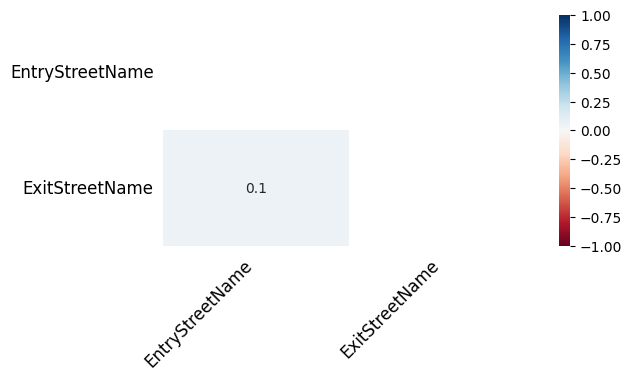

In [ ]:
import missingno

missingno.heatmap(df_train, figsize=(6,3), fontsize=12)


Пропуски в названиях улиц обычно не одновременны и, вероятно, не несут систематического характера.

Посмотрим их расположения на карте для лучшего понимания:

In [ ]:
rows_with_na = df_train[(df_train[['EntryStreetName', 'ExitStreetName']].isna().sum(axis=1) > 0)]

px.scatter_mapbox(
    rows_with_na, lat="Latitude", lon="Longitude", zoom=4,
    title="Intersections with unknown streets names",
    color_continuous_scale=px.colors.cyclical.Twilight,
    mapbox_style='open-street-map',
    width=1000,
    height=600,
)

По точкам на карте видно, что пути с пропусками в названиях улиц проходят через съезды больших развязок или частные территории, которое действительно не имеют названий. То есть *отсутствие названия улицы может быть важным для качества предсказаний признаком*.

#### Корреляции значений признаков

In [ ]:
import plotly.graph_objects as go

correlation_matrix = pd.concat([df_test, df_train]).corr(numeric_only=True)

heatmap = go.Heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns,
    y=correlation_matrix.index,
    colorscale='RdBu',
    zmin=-1,
    zmax=1,
    colorbar=dict(title="Correlation"),
    hovertemplate='Feature X: %{x}<br>Feature Y: %{y}<br>Correlation: %{z:.2f}<extra></extra>'
)

fig = go.Figure(data=[heatmap])
fig.update_layout(
    title='Матрица корреляции признаков',
    xaxis_nticks=36,
    width=900,
    height=800
)
fig.show()


Каких-либо значимых корреляций не обнаружено.

* Целевые переменные и должны быть скоррелированы по смыслу.
* Корреляция компонент координат говорит о небольшой вытянутости точек по диагонали.
* Корреляция индексов строк и перекрёстков тоже естественны, ведь они добавлялись одновременно и последовательно.

#### Изучение категориальных признаков

In [ ]:
cat_features = [
    'IntersectionId', 'City',
    'Path', 'EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading'
]


**Названия улиц в пути**

In [ ]:
df_train['Path'][0] == df_train['EntryStreetName'][0] + '_' + df_train['EntryHeading'][0] + '_' + df_train['ExitStreetName'][0] + '_' + df_train['ExitHeading'][0]


True

То есть, в столбце `Path` храниться конкатенация через символ `'_'` значений из признаков `EntryStreetName`, `ExitStreetName`, `EntryHeading`, `ExitHeading`.

Тогда попробуем восстаносвить пропущенные значения в столбцах `EntryStreetName` и `ExitStreetName`.

In [ ]:
df_train.loc[df_train['EntryStreetName'].isna().values, "Path"].head(3)

,Path
381,Unknown_NE_Marietta Boulevard Northwest_SE
7135,Unknown_N_Porsche Avenue_W
7144,Unknown_N_Porsche Avenue_W


In [ ]:
df_train.loc[df_train['ExitStreetName'].isna().values, "Path"].head(3)


,Path
7138,Porsche Avenue_W_Unknown_S
7140,Porsche Avenue_E_Unknown_S
7141,Porsche Avenue_E_Unknown_S


Как видно этого сделать не получиться: названия улиц заменены на `Unknown`.

Пока оставим столбец `Path` для использования в кодировании на втором этапе проекта.
<!-- Тогда просто удалим столбец `Path` как дублирующий. -->

**Распределение данных по перекрёсткам**

In [ ]:
intersections = {
    "train": df_train["IntersectionId"].value_counts(),
    "test": df_test["IntersectionId"].value_counts(),
    "total": pd.concat([df_test, df_train])["IntersectionId"].value_counts(),
}

print(f"Уникальных перекрёстков в train: {len(intersections["train"])}")
print(f"Уникальных перекрёстков в test: {len(intersections["test"])}")
print(f"Уникальных перекрёстков всего: {len(intersections["total"])}")

print(f"Процент новых перекрёстков в тестовых данных: {(len(intersections["total"]) - len(intersections["train"])) / len(intersections["train"]):.1%}")


Уникальных перекрёстков в train: 2559
Уникальных перекрёстков в test: 2765
Уникальных перекрёстков всего: 2839
Процент новых перекрёстков в тестовых данных: 10.9%


В общем, в тестовых данных не слишком много неизвестных перекрёстков для сильного смещения — около 11% — но это значит, что близость по коорд.

In [ ]:


fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i, (df_name, df) in enumerate(intersections.items()):
    sns.countplot(x=df, ax=axes[i], alpha=0.7)
    axes[i].set_title(df_name)
    axes[i].set_ylabel('Частота')



plt.tight_layout()
plt.show()


SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-3702173482.py, line 2)

#### Временные признаки

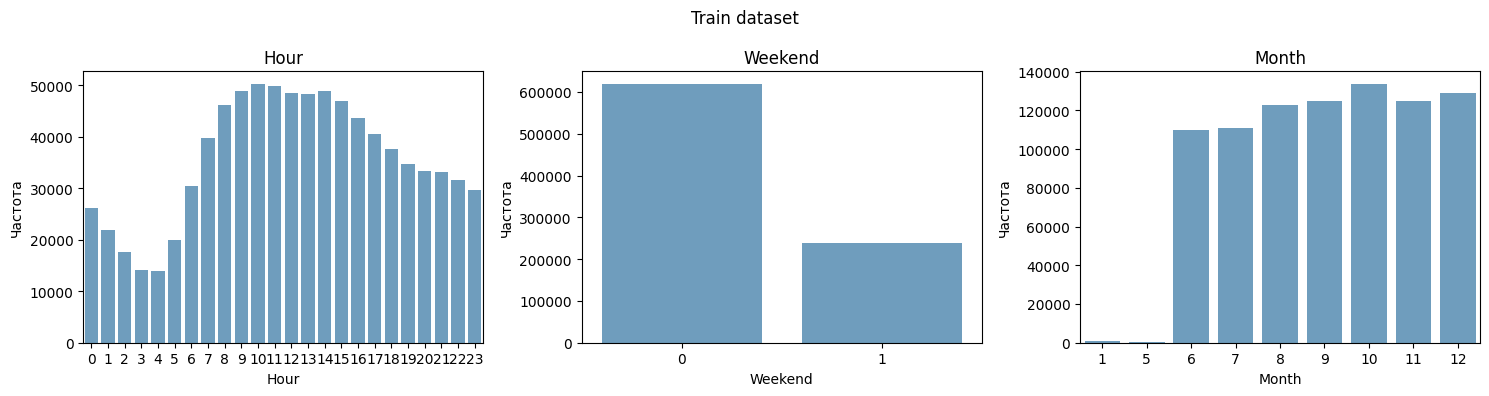

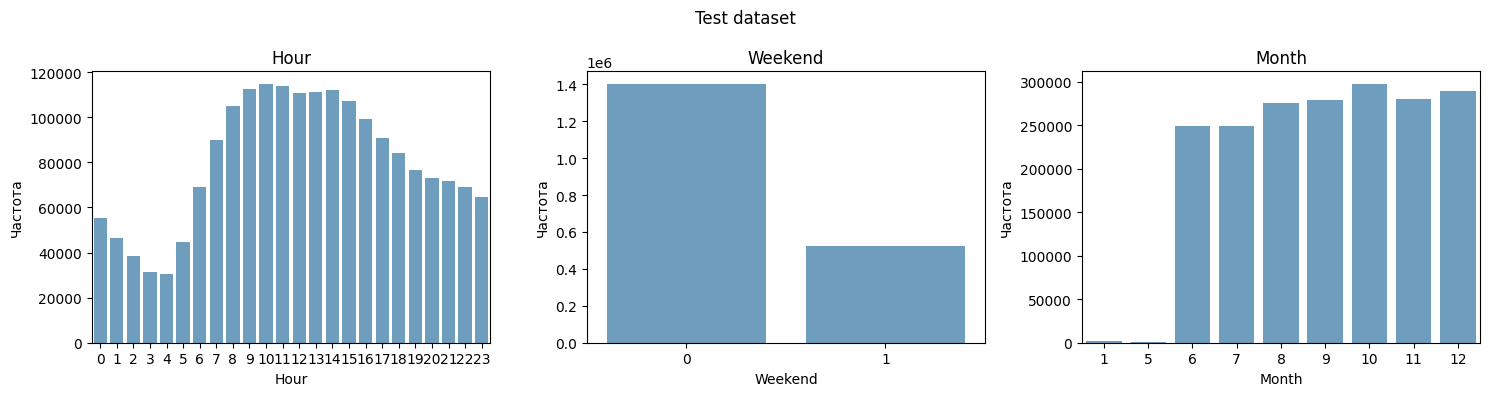

In [ ]:

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(['Hour', 'Weekend', 'Month']):
    sns.countplot(x=df_train[col], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Частота')

plt.suptitle("Train dataset")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, col in enumerate(['Hour', 'Weekend', 'Month']):
    sns.countplot(x=df_test[col], ax=axes[i], alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Частота')

plt.suptitle("Test dataset")

plt.tight_layout()
plt.show()


Как видно из правых графиков, записи проводились почти только с июня по декабрь включительно. Видимо, в рамках одного года. И разбиение на train/test производилось равномерно по времени и мы можем сфокусироваться на тренировочной выборке.

Цикличности в переменной `Month` нет и кодировать её через синус и косинус нет смысла.

#Baseline


In [ ]:
!pip install catboost
import pandas as pd
import numpy as np
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

train = df_train

 # уменьшена подвыборка для скорости (200k вместо 856k)
train = train.sample(n=200_000, random_state=42).reset_index(drop=True)

feature_cols = [
    'IntersectionId', 'Latitude', 'Longitude',
    'EntryStreetName', 'ExitStreetName',
    'EntryHeading', 'ExitHeading',
    'Hour', 'Weekend', 'Month', 'Path', 'City'
]
target_cols = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80']
cat_features = ['IntersectionId', 'EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Path', 'City']

# Обработка NaN
train['EntryStreetName'] = train['EntryStreetName'].fillna('MISSING').astype(str)
train['ExitStreetName'] = train['ExitStreetName'].fillna('MISSING').astype(str)

X = train[feature_cols]
y = train[target_cols]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ускоряем итерации и lr для скорости
model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=5,
    loss_function='MultiRMSE',
    eval_metric='MultiRMSE',
    random_seed=42,
    verbose=50,
    early_stopping_rounds=30,
    cat_features=cat_features,
    task_type='CPU'
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)

y_pred = model.predict(X_val)
baseline_mae_p20 = mean_absolute_error(y_val.iloc[:, 0], y_pred[:, 0])
baseline_mae_p50 = mean_absolute_error(y_val.iloc[:, 1], y_pred[:, 1])
baseline_mae_p80 = mean_absolute_error(y_val.iloc[:, 2], y_pred[:, 2])
print(f"\n бейзлайн MAE: p20={baseline_mae_p20:.6f}, p50={baseline_mae_p50:.6f}, p80={baseline_mae_p80:.6f}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.9 MB/s eta 0:00:00
0:	learn: 32.3370694	test: 32.1585007	best: 32.1585007 (0)	total: 223ms	remaining: 44.5s
50:	learn: 25.3138450	test: 23.9337909	best: 23.9337909 (50)	total: 8.89s	remaining: 26s
100:	learn: 24.8159351	test: 23.5589495	best: 23.5589495 (100)	total: 18.5s	remaining: 18.1s
150:	learn: 24.5314288	test: 23.3602936	best: 23.3602936 (150)	total: 28.2s	remaining: 9.16s
199:	learn: 24.3732586	test: 23.2604922	best: 23.2604922 (199)	total: 37.4s	remaining: 0us

bestTest = 23.26049218
bestIteration = 199


 бейзлайн MAE: p20=2.270862, p50=6.152618, p80=11.862504


#Этап 2. Работа с аномалиями и генерация признаков

##2.1.1 Работа с аномалиями и выбросами целевой переменной

Найдём аномалии по следующим логичным и простым предположениям

* Время стоянки не может быть отрицательным.

* Экстремально большие значения (например, > 10 800 сек = 3 часа) — подозрительны, так как стоянка на одном перекрёстке редко длится часами.

* Перцентили должны удовлетворять логике p20 ≤ p50 ≤ p80

отрицательные значения, нарушение логики

In [ ]:
print("Отрицательные значения:")
for col in target_cols:
    neg_count = (df_train[col] < 0).sum()
    print(f"  {col}: {neg_count}")

invalid_order = df_train[
    (df_train['TotalTimeStopped_p20'] > df_train['TotalTimeStopped_p50']) |
    (df_train['TotalTimeStopped_p50'] > df_train['TotalTimeStopped_p80'])
]
print(f"\nНарушение порядка перцентилей: {len(invalid_order)} строк")

Отрицательные значения:
  TotalTimeStopped_p20: 0
  TotalTimeStopped_p50: 0
  TotalTimeStopped_p80: 0

Нарушение порядка перцентилей: 0 строк


### IQR и квнатили

In [ ]:
def detect_outliers_iqr(series, multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    return (series < lower) | (series > upper)

outliers_iqr = {}
for col in target_cols:
    outliers_iqr[col] = detect_outliers_iqr(df_train[col], multiplier=3.0)  # строже

print("Выбросы по IQR:")
for col in target_cols:
    print(f"  {col}: {outliers_iqr[col].sum()} ({outliers_iqr[col].mean()*100:.2f}%)")

Выбросы по IQR:
  TotalTimeStopped_p20: 78901 (9.21%)
  TotalTimeStopped_p50: 40445 (4.72%)
  TotalTimeStopped_p80: 6117 (0.71%)


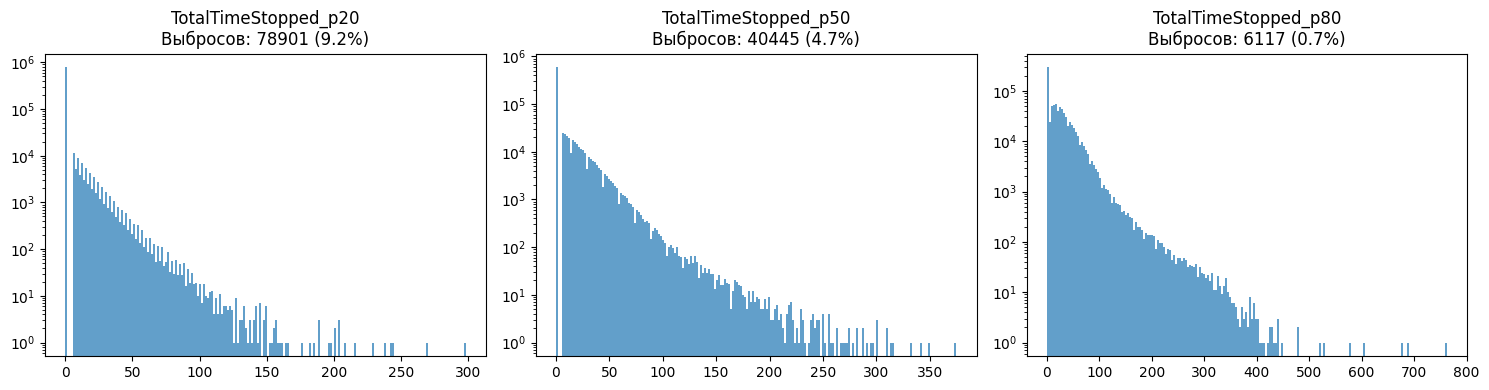

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80']):
    ax[i].hist(df_train[col], bins=200, alpha=0.7)
    ax[i].set_title(f'{col}\nВыбросов: {outliers_iqr[col].sum()} ({outliers_iqr[col].mean()*100:.1f}%)')
    ax[i].set_yscale('log')  # лог-шкала, чтобы видеть хвосты
plt.tight_layout()
plt.show()

Как видно из графиков, у р20 перецентиля оцень длинный хвост после резкого обрыва после 180 , это означает, что возникли ошибки агрегации: например, в трек попали много стоянок, и p20 искусственно завышен (это логично, т.к. 20% поехдок не стоят на перекрестке дольше 4 минут). Скорректировать это можно с помощью отдельного логичного порога по кажому перцентилю. Также ограничим и р50, р80

In [ ]:
import pandas as pd

target_cols = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80']
quartiles = df_train[target_cols].quantile([0.25, 0.5, 0.75])
quartiles.index = ['Q1 (25%)', 'Q2 (50% = медиана)', 'Q3 (75%)']

print("Квартили для целевых переменных:")
print(quartiles.round(2))

Квартили для целевых переменных:
                    TotalTimeStopped_p20  TotalTimeStopped_p50  \
Q1 (25%)                             0.0                   0.0   
Q2 (50% = медиана)                   0.0                   0.0   
Q3 (75%)                             0.0                  10.0   

                    TotalTimeStopped_p80  
Q1 (25%)                             0.0  
Q2 (50% = медиана)                  16.0  
Q3 (75%)                            34.0  


In [ ]:
print("99.5% квантили:")
for col in target_cols:
    print(f"  {col}: {df_train[col].quantile(0.995):.0f} сек")


99.5% квантили:
  TotalTimeStopped_p20: 46 сек
  TotalTimeStopped_p50: 83 сек
  TotalTimeStopped_p80: 153 сек


Но 99.5 квантили показывают, что IQR сильно завышают(0, 10, 34 сек) наше количество выбросов, т.к. наше распределение сильно смещено влево, поэтому эта метрика не подходит к нашей задаче, лучше создать ограничения по кантилям, сделаем это с небольшим запасом позже.

###Z-оценка

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

target_cols = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80']

Z_THRESHOLD = 3.0

z_scores = {}
outliers_z = {}

print("Z-оценка и выбросы (|z| > 3):")
print("-" * 50)

for col in target_cols:
    z = np.abs(stats.zscore(df_train[col]))

    z_scores[col] = z
    outliers_z[col] = z > Z_THRESHOLD

    n_outliers = outliers_z[col].sum()
    percent = n_outliers / len(df_train) * 100

    max_outlier_val = df_train.loc[outliers_z[col], col].max() if n_outliers > 0 else 0

    print(f"{col}:")
    print(f"  Выбросов: {n_outliers} ({percent:.2f}%)")
    print(f"  Макс. значение среди выбросов: {max_outlier_val:.0f} сек")
    print()

Z-оценка и выбросы (|z| > 3):
--------------------------------------------------
TotalTimeStopped_p20:
  Выбросов: 20017 (2.34%)
  Макс. значение среди выбросов: 298 сек

TotalTimeStopped_p50:
  Выбросов: 18219 (2.13%)
  Макс. значение среди выбросов: 375 сек

TotalTimeStopped_p80:
  Выбросов: 12632 (1.48%)
  Макс. значение среди выбросов: 763 сек



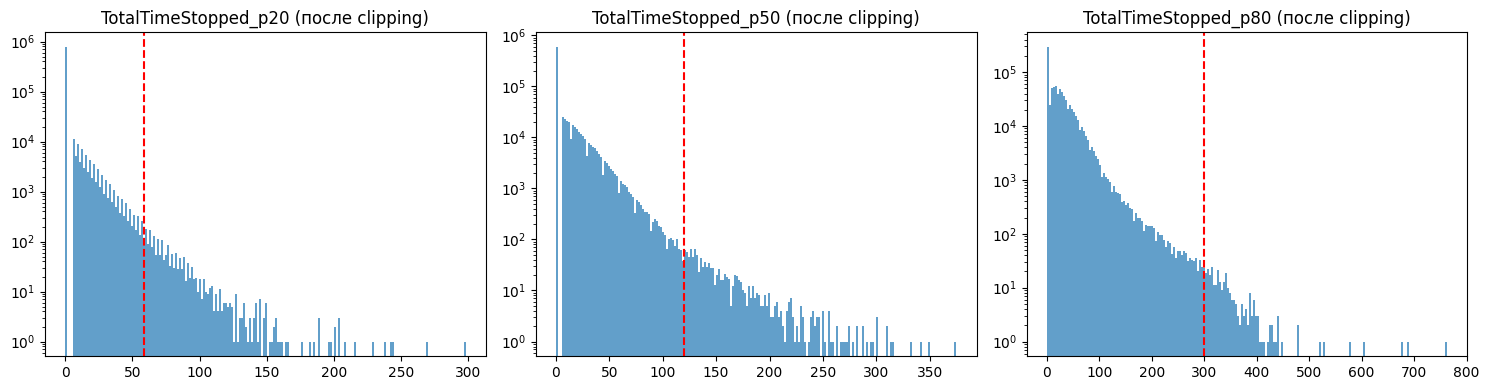

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
for i, col in enumerate(target_cols):
    ax[i].hist(df_train[col], bins=200, alpha=0.7)
    ax[i].set_title(f'{col}')
    ax[i].set_yscale('log')
    # Отметим порог
    thresh = {'TotalTimeStopped_p20': 59, 'TotalTimeStopped_p50': 120, 'TotalTimeStopped_p80': 300}[col]
    ax[i].axvline(thresh, color='red', linestyle='--')
plt.tight_layout()
plt.show()

p20 = 298 сек = почти 5 минут — даже 20% самых быстрых поездок стоят так долго, что маловероятно.

p50 = 375 сек = 6.25 минут — медиана стоянки в 6 минут на перекрёстке возможна, но чаще всего она ниже.

p80 = 763 сек = 12.7 минут — это уже крайне редкое событие (менее 1.5% по Z).

Отсюда можно сделать вывод, что Z-оценка мягче оценивает, чем квантили, но строже чем IQR

### Тест Граббса

In [ ]:
def grubbs_test(data, alpha=0.05):

    n = len(data)
    if n < 3:
        return False, None

    mean = np.mean(data)
    std = np.std(data, ddof=1)
    if std == 0:
        return False, None

    max_val = np.max(data)
    g = (max_val - mean) / std

    t_val = stats.t.ppf(1 - alpha / (2 * n), n - 2)
    g_critical = ((n - 1) * t_val) / np.sqrt(n * (n - 2 + t_val**2))

    is_outlier = g > g_critical
    return is_outlier, max_val

target_cols = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80']

print("Тест Граббса (alpha=0.05) на исходных данных:")
print("-" * 50)

for col in target_cols:
    data = df_train[col].values
    is_outlier, max_val = grubbs_test(data, alpha=0.05)

    if is_outlier:
        print(f"{col}:Найден выброс")
        print(f"  Макс. значение: {max_val:.0f} сек")
    else:
        print(f"{col}: Выброс НЕ найден")
    print()

Тест Граббса (alpha=0.05) на исходных данных:
--------------------------------------------------
TotalTimeStopped_p20:Найден выброс
  Макс. значение: 298 сек

TotalTimeStopped_p50:Найден выброс
  Макс. значение: 375 сек

TotalTimeStopped_p80:Найден выброс
  Макс. значение: 763 сек



теста Граббса подтвердил, что максимальные значения в целевых переменных статистически аномальны. Все методы согласны, что самые большие значения статистически и физически неправдоподобны. Но Z-оценка и Метод Граббса не даёт конкретных порогов, поэтому воспользуемя методом квантилей и сделаем клиппинг по 99.5 квантилю, чтобы убрать только действительно нереалистичные результаты.

### Clipping по квантилям

In [ ]:
CLIP_THRESHOLDS = {
    'TotalTimeStopped_p20': min(60, max(50, int(df_train['TotalTimeStopped_p20'].quantile(0.995) * 1.3))),
    'TotalTimeStopped_p50': min(120, max(100, int(df_train['TotalTimeStopped_p50'].quantile(0.995) * 1.5))),
    'TotalTimeStopped_p80': min(300, max(200, int(df_train['TotalTimeStopped_p80'].quantile(0.995) * 2.0))),
}

print("Используемые пороги для clipping:")
for col, thresh in CLIP_THRESHOLDS.items():
    original_max = df_train[col].max()
    clipped_count = (df_train[col] > thresh).sum()
    print(f"  {col}: порог={thresh} сек, будет ограничено {clipped_count} значений ")

for col, thresh in CLIP_THRESHOLDS.items():
    df_train[col] = df_train[col].clip(upper=thresh)

Используемые пороги для clipping:
  TotalTimeStopped_p20: порог=59 сек, будет ограничено 1876 значений 
  TotalTimeStopped_p50: порог=120 сек, будет ограничено 1061 значений 
  TotalTimeStopped_p80: порог=300 сек, будет ограничено 285 значений 


##2\.1.2 Работа с аномалиями и выбросами в признаках

Аномалии наиболее вероятны в:

Latitude, Longitude — координаты могут быть сбиты (ошибки GPS).
IntersectionId — редкие/некорректные ID.
Hour — должно быть от 0 до 23; значения вне этого диапазона — ошибка.
Month — от 1 до 12.

Проверка на логику

In [ ]:
print("Некорректные Hour:", (df_train['Hour'] < 0) | (df_train['Hour'] > 23).sum())
print("Некорректные Month:", (df_train['Month'] < 1) | (df_train['Month'] > 12).sum())


Некорректные Hour: 0         False
1         False
2         False
3         False
4         False
          ...  
856382    False
856383    False
856384    False
856385    False
856386    False
Name: Hour, Length: 856387, dtype: bool
Некорректные Month: 0         False
1         False
2         False
3         False
4         False
          ...  
856382    False
856383    False
856384    False
856385    False
856386    False
Name: Month, Length: 856387, dtype: bool


Проведём Z-оценку для координат

In [ ]:
from scipy import stats
import numpy as np

for col in ['Latitude', 'Longitude']:
    z = np.abs(stats.zscore(df_train[col]))
    outliers = z > 3.0
    print(f"{col}: {outliers.sum()} выбросов ({outliers.mean()*100:.2f}%)")

Latitude: 0 выбросов (0.00%)
Longitude: 0 выбросов (0.00%)


проведем IQR для ID, на случай, если вдруг есть опечатки в номерах

In [ ]:
def iqr_outliers(series, multiplier=3.0):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    return (series < Q1 - multiplier*IQR) | (series > Q3 + multiplier*IQR)

outliers_int = iqr_outliers(df_train['IntersectionId'])
print(f"Аномальные IntersectionId: {outliers_int.sum()}")

Аномальные IntersectionId: 0


Визуализируем на всякий случай координаты (в них нет выбросов, но если бы были, то отметились бы красным)

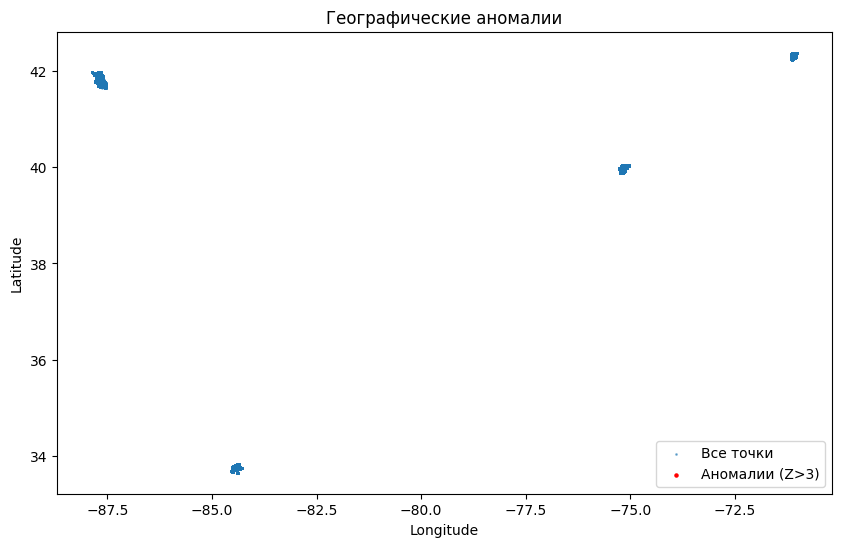

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df_train['Longitude'], df_train['Latitude'], s=1, alpha=0.5, label='Все точки')

# Выбросы по Z
z_lat = np.abs(stats.zscore(df_train['Latitude'])) > 3
z_lon = np.abs(stats.zscore(df_train['Longitude'])) > 3
outliers_geo = z_lat | z_lon

plt.scatter(df_train.loc[outliers_geo, 'Longitude'],
            df_train.loc[outliers_geo, 'Latitude'],
            c='red', s=5, label='Аномалии (Z>3)')
plt.legend()
plt.title('Географические аномалии')
plt.xlabel('Longitude'); plt.ylabel('Latitude')
plt.show()

Проверим редкие категориальные признаки (улицы, города)

In [ ]:
def rare_categories(series, min_freq=50):
    counts = series.value_counts()
    return ~series.isin(counts[counts >= min_freq].index)

for col in ['EntryStreetName', 'ExitStreetName', 'Path']:
    rare = rare_categories(df_train[col], min_freq=50)
    print(f"{col}: {rare.sum()} редких значений ({rare.mean()*100:.2f}%)")

EntryStreetName: 17526 редких значений (2.05%)
ExitStreetName: 15820 редких значений (1.85%)
Path: 152659 редких значений (17.83%)


Наш датасет оказался достаточно чистым, поэтому т.к. координаты - основной ожидаемый источник аномалий, чист, то дополнительные признаки мы можем создать только по редким категориальным данным. Создадим эти признаки и расставим флаги наличия выбросов

In [ ]:
# Флаг редкого перекрёстка
intersection_freq = df_train['IntersectionId'].value_counts()
df_train['is_rare_intersection'] = (
    df_train['IntersectionId'].map(intersection_freq) < 30
).astype(int)

# Флаг редкой улицы входа/выхода
entry_freq = df_train['EntryStreetName'].value_counts()
exit_freq = df_train['ExitStreetName'].value_counts()

df_train['is_rare_entry'] = (
    df_train['EntryStreetName'].map(entry_freq) < 50
).astype(int)
df_train['is_rare_exit'] = (
    df_train['ExitStreetName'].map(exit_freq) < 50
).astype(int)

# Флаг редкого пути
path_freq = df_train['Path'].value_counts()
df_train['is_rare_path'] = (
    df_train['Path'].map(path_freq) < 50
).astype(int)

df_train['n_rare_components'] = (
    df_train['is_rare_intersection'] +
    df_train['is_rare_entry'] +
    df_train['is_rare_exit'] +
    df_train['is_rare_path']
)

print("Новые признаки добавлены:")
print(df_train[['is_rare_intersection', 'n_rare_components' ]].sum())

Новые признаки добавлены:
is_rare_intersection      3714
n_rare_components       175284
dtype: int64


Теперь применим ML-метод для поиска сложных аномалий. Поскольку у нас нет размеченных аномалий, будем использовать Isolation Forest и сравним его с Local Outlier Factor (LOF).

Подготовим данные для модели

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report

df_ml = df_train.copy()

num_features = ['Latitude', 'Longitude', 'Hour', 'Weekend', 'Month', 'IntersectionId']
cat_features_raw = ['EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Path', 'City']

label_encoders = {}
for col in cat_features_raw:
    le = LabelEncoder()
    df_ml[col] = df_ml[col].fillna('MISSING')
    df_ml[col] = le.fit_transform(df_ml[col].astype(str))
    label_encoders[col] = le
ml_features = num_features + cat_features_raw

print(f"Подготовлено {len(ml_features)} числовых признаков для ML-анализа.")

Подготовлено 12 числовых признаков для ML-анализа.


Isolation Forest


In [ ]:
iso_forest = IsolationForest(
    contamination=0.01,
    random_state=42,
    n_estimators=100,
    n_jobs=-1
)

df_ml['anomaly_iso'] = iso_forest.fit_predict(df_ml[ml_features])
df_ml['anomaly_iso'] = (df_ml['anomaly_iso'] == -1).astype(int)

print(f"Isolation Forest: {df_ml['anomaly_iso'].sum()} аномалий ({df_ml['anomaly_iso'].mean()*100:.2f}%)")

Isolation Forest: 8564 аномалий (1.00%)


Теперь Local Outlier Factor

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_ml[ml_features])

lof = LocalOutlierFactor(
    n_neighbors=50,
    contamination=0.01,
    n_jobs=-1
)

df_ml['anomaly_lof'] = lof.fit_predict(X_scaled)
df_ml['anomaly_lof'] = (df_ml['anomaly_lof'] == -1).astype(int)

print(f"LOF: {df_ml['anomaly_lof'].sum()} аномалий ({df_ml['anomaly_lof'].mean()*100:.2f}%)")

LOF: 8564 аномалий (1.00%)


Isolation Forest хорошо работает на больших данных и выявляет общие аномалии, а LOF может выявить локальные аномалие, которые пропустит лес, поэтому посмотрим на точки, которые выявили оба метода, она наши кандидаты в аномалии, визуализируем их

In [ ]:
both = (df_ml['anomaly_iso'] == 1) & (df_ml['anomaly_lof'] == 1)
only_iso = (df_ml['anomaly_iso'] == 1) & (df_ml['anomaly_lof'] == 0)
only_lof = (df_ml['anomaly_iso'] == 0) & (df_ml['anomaly_lof'] == 1)

print("\nСравнение методов:")
print(f"Общие аномалии: {both.sum()}")
print(f"Только Isolation Forest: {only_iso.sum()}")
print(f"Только LOF: {only_lof.sum()}")


Сравнение методов:
Общие аномалии: 149
Только Isolation Forest: 8415
Только LOF: 8415


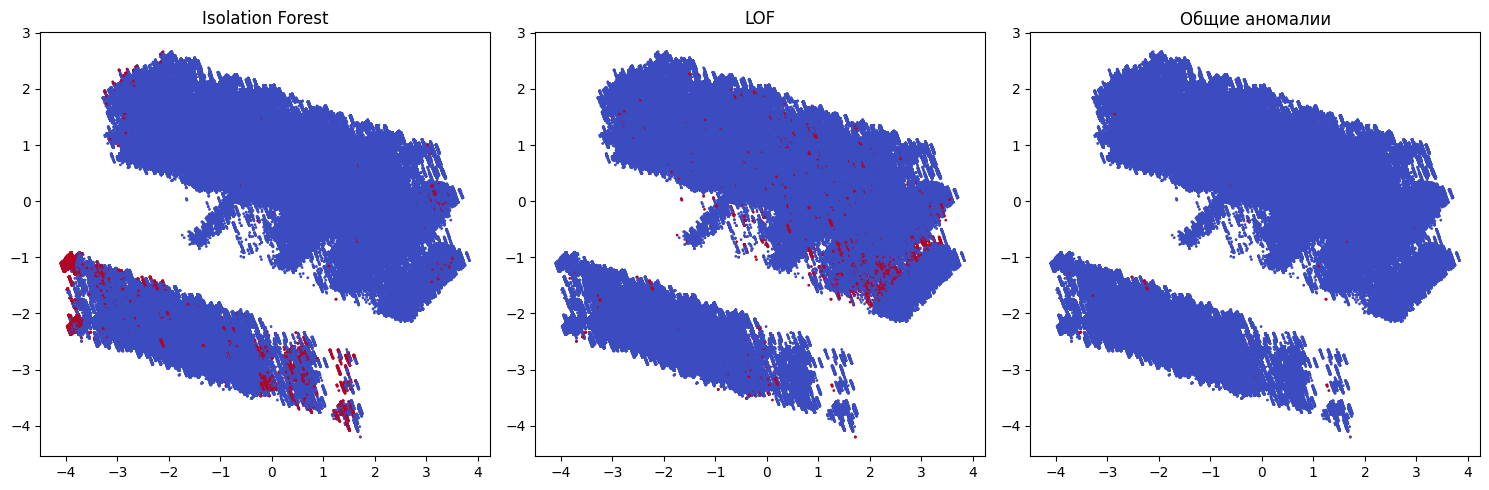

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_ml['anomaly_iso'], cmap='coolwarm', s=1)
plt.title('Isolation Forest')

plt.subplot(1, 3, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_ml['anomaly_lof'], cmap='coolwarm', s=1)
plt.title('LOF')

plt.subplot(1, 3, 3)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=both.astype(int), cmap='coolwarm', s=1)
plt.title('Общие аномалии')

plt.tight_layout()
plt.show()

Всего выявлено 149 общих аномалий. На графиках видно, что характер выявленных аномалий достаточно разный, именно поэтому получилось мало общих. С одной стороны их можно удалить, но это не даст сильного улучшения нашей модели, т.к. их количество мало. Поэтому создадим отдельно новый признак, чтобы лучше обрабатывать подобные случаи во время обучения и предсказания.

In [ ]:
df_train['is_ml_anomaly'] = both.astype(int)

print(f"Добавлена фича 'is_ml_anomaly': {df_train['is_ml_anomaly'].sum()} аномалий")

Добавлена фича 'is_ml_anomaly': 149 аномалий


###Влияние обработки аномалий на MAE

In [ ]:
train = df_train

train = train.sample(n=200_000, random_state=42).reset_index(drop=True)
feature_cols = [
    'IntersectionId', 'Latitude', 'Longitude',
    'EntryStreetName', 'ExitStreetName',
    'EntryHeading', 'ExitHeading',
    'Hour', 'Weekend', 'Month', 'Path', 'City',
    # Новые фичи
    'is_rare_intersection',
    'is_rare_entry',
    'is_rare_exit',
    'is_rare_path',
    'n_rare_components',
    'is_ml_anomaly'
]
target_cols = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80']
cat_features = [
   'IntersectionId', 'EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Path', 'City'
]

# Обработка NaN
train['EntryStreetName'] = train['EntryStreetName'].fillna('MISSING').astype(str)
train['ExitStreetName'] = train['ExitStreetName'].fillna('MISSING').astype(str)

X = train[feature_cols]
y = train[target_cols]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ускоряем итерации и lr для скорости
model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=5,
    loss_function='MultiRMSE',
    eval_metric='MultiRMSE',
    random_seed=42,
    verbose=50,
    early_stopping_rounds=30,
    cat_features=cat_features,
    task_type='CPU'
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)

y_pred = model.predict(X_val)
anomaly_mae_p20 = mean_absolute_error(y_val.iloc[:, 0], y_pred[:, 0])
anomaly_mae_p50 = mean_absolute_error(y_val.iloc[:, 1], y_pred[:, 1])
anomaly_mae_p80 = mean_absolute_error(y_val.iloc[:, 2], y_pred[:, 2])
print(f"\n MAE после обработки аномалий: p20={anomaly_mae_p20:.6f}, p50={anomaly_mae_p50:.6f}, p80={anomaly_mae_p80:.6f}")
print(f"\n бейзлайн MAE: p20={baseline_mae_p20:.6f}, p50={baseline_mae_p50:.6f}, p80={baseline_mae_p80:.6f}")

0:	learn: 31.8056467	test: 31.6932744	best: 31.6932744 (0)	total: 146ms	remaining: 29.1s
50:	learn: 24.6776511	test: 23.3516293	best: 23.3516293 (50)	total: 8.53s	remaining: 24.9s
100:	learn: 24.2330623	test: 22.9872583	best: 22.9872583 (100)	total: 17.6s	remaining: 17.3s
150:	learn: 23.9471669	test: 22.7845111	best: 22.7845111 (150)	total: 27.5s	remaining: 8.92s
199:	learn: 23.7850788	test: 22.6751064	best: 22.6751064 (199)	total: 36.7s	remaining: 0us

bestTest = 22.67510637
bestIteration = 199


 MAE после обработки аномалий: p20=2.199691, p50=6.107954, p80=11.823571

 бейзлайн MAE: p20=2.270862, p50=6.152618, p80=11.862504


Отлично, МАЕ уменьшился, качество модели возрасло немного

## 2.2 Генерация признаков

#### 2.2.1 Обработка категориальных переменных

In [ ]:
from sklearn.preprocessing import TargetEncoder, OneHotEncoder


'EntryStreetName', 'ExitStreetName', 'EntryHeading', 'ExitHeading', 'Path', 'City'



('EntryStreetName',
 'ExitStreetName',
 'EntryHeading',
 'ExitHeading',
 'Path',
 'City')

Закодируем переменную city через target encoding с кроссвалидации для избежания утечки информации в будущее.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

def kfold_target_encoding(df, col, target_cols, k=5, smoothing=10):
    """
    Применяет K-Fold Target Encoding для мульти-таргетной регрессии.
    Возвращает DataFrame с новыми колонками: {col}_te_p20, {col}_te_p50, {col}_te_p80
    """
    df = df.copy()
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    for target in target_cols:
        te_col = f'{col}_te_{target.split("_")[-1]}'
        df[te_col] = np.nan

        for train_idx, val_idx in kf.split(df):
            mean_map = df.iloc[train_idx].groupby(col)[target].mean()
            global_mean = df[target].mean()
            counts = df.iloc[train_idx].groupby(col)[target].count()
            smoothed = (mean_map * counts + global_mean * smoothing) / (counts + smoothing)

            df.loc[val_idx, te_col] = df.iloc[val_idx][col].map(smoothed).fillna(global_mean)

    return df

df = kfold_target_encoding(df_train, 'City', target_cols, k=5, smoothing=20)

Все остальные переменные закодируем с помощью lable ancoding. Это наиболее подходящий вариант, т.к. OHE привел бы к взрыву размерности из-за большог количества уникальных значений в данных

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encode_cols = ['EntryStreetName', 'ExitStreetName', 'Path', 'EntryHeading', 'ExitHeading']

for col in label_encode_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [ ]:
feature_cols = [
    'IntersectionId', 'Latitude', 'Longitude',
    'Hour', 'Weekend', 'Month',
    'EntryStreetName', 'ExitStreetName', 'Path',
    'EntryHeading', 'ExitHeading',
    'City_te_p20', 'City_te_p50', 'City_te_p80',
    'is_rare_intersection', 'is_rare_entry', 'is_rare_exit', 'is_rare_path',
    'n_rare_components', 'is_ml_anomaly'
]


Фиксация измененний метрик

In [ ]:
train = df_train
train = df

train['EntryStreetName'] = train['EntryStreetName'].fillna('MISSING').astype(str)
train['ExitStreetName'] = train['ExitStreetName'].fillna('MISSING').astype(str)
feature_cols = [
    'IntersectionId', 'Latitude', 'Longitude',
    'Hour', 'Weekend', 'Month',
    'EntryStreetName', 'ExitStreetName', 'Path',
    'EntryHeading', 'ExitHeading',
    'City_te_p20', 'City_te_p50', 'City_te_p80',
    'is_rare_intersection', 'is_rare_entry', 'is_rare_exit', 'is_rare_path',
    'n_rare_components', 'is_ml_anomaly'
]
target_cols = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80']
cat_features = []
X = train[feature_cols]
y = train[target_cols]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ускоряем итерации и lr для скорости
model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=5,
    loss_function='MultiRMSE',
    eval_metric='MultiRMSE',
    random_seed=42,
    verbose=50,
    early_stopping_rounds=30,
    cat_features=cat_features,
    task_type='CPU'
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)

y_pred = model.predict(X_val)
encoded_mae_p20 = mean_absolute_error(y_val.iloc[:, 0], y_pred[:, 0])
encoded_mae_p50 = mean_absolute_error(y_val.iloc[:, 1], y_pred[:, 1])
encoded_mae_p80 = mean_absolute_error(y_val.iloc[:, 2], y_pred[:, 2])
print(f"\n после кодирования MAE: p20={encoded_mae_p20:.6f}, p50={encoded_mae_p50:.6f}, p80={encoded_mae_p80:.6f}")

0:	learn: 32.4542136	test: 32.3875615	best: 32.3875615 (0)	total: 57.3ms	remaining: 11.4s
50:	learn: 30.5380675	test: 30.4664701	best: 30.4664701 (50)	total: 2.69s	remaining: 7.85s
100:	learn: 29.8480423	test: 29.7826918	best: 29.7826918 (100)	total: 5.25s	remaining: 5.14s
150:	learn: 29.3547010	test: 29.2879672	best: 29.2879672 (150)	total: 7.88s	remaining: 2.56s
199:	learn: 28.9821869	test: 28.9191363	best: 28.9191363 (199)	total: 10.4s	remaining: 0us

bestTest = 28.91913631
bestIteration = 199


 после кодирования MAE: p20=2.859844, p50=9.184705, p80=17.539677


#### 2.2.2 Добавление признаков, основанных на ближайших соседях

У нас есть координаты, поэтомц добавим несколько признаков, основанных на них

Среднее значение таргета у k ближайших соседей  (Передаст локальную структуру таргета), расстояние до ближайшего соседа (поможет отличить шум от реальных периферийных перекрёстков), плотность окружения(определит тип локации (центр vs окраина), что влияет на трафик).

In [ ]:
from sklearn.neighbors import NearestNeighbors

k = 10
radius = 500
df['x'] = df['Longitude'] * 111000 * np.cos(np.radians(df['Latitude']))
df['y'] = df['Latitude'] * 111000
coords = df[['x', 'y']].values

nn = NearestNeighbors(n_neighbors=k+1, metric='euclidean', n_jobs=-1)
nn.fit(coords)

distances, indices = nn.kneighbors(coords)

distances = distances[:, 1:]
indices = indices[:, 1:]
for target in target_cols:
    neighbor_vals = df.iloc[indices.flatten()][target].values.reshape(-1, k)
    df[f'{target}_knn_mean'] = neighbor_vals.mean(axis=1)

In [ ]:
df['dist_to_nearest'] = distances[:, 0]  # первое расстояние — до ближайшего

In [ ]:
from sklearn.neighbors import RadiusNeighborsRegressor

df['density_500m'] = (distances <= 500).sum(axis=1)

#### 2.2.3 Обработка временных признаков

Из EDA известно, что в признаке, хронящем месяц, нет цикличности из-за неполноты диапазона в данных.

Признак `Weekend` бинарный и зацикливать в нём нечего.

Имеет смысл кодировать через синус и косинус только переменную `Hour` и то только для линейных моделей.


<!-- Мы используем деревянную модель, поэтому кодировать  -->

#### 2.2.4 Контекстные признаки, отражающие специфику задачи

Сформулируем несколько признаков, основанных на следующих гипотезах:

Во-первых, в больших городах есть часы пик с утра и вечером

Во-вторых, в выходные и праздничные дни трафик другой (меньше пробок в центре, но больше на выездах)

В-третьих, в странах с правосторонним движением поворот налево и разворот совершаются гораздо дольше, чем поаорот направо или просто проезд прямо

В-четвертых, большие перекрёстки с несколькими въездами и выездами сложнее и на них дольше стоят.

In [ ]:
def distance_to_peak_hour(hour):
    # Утренний пик: 8, вечерний: 17.5 (среднее)
    morning_peak = 8
    evening_peak = 17.5
    dist_morning = min(abs(hour - morning_peak), 24 - abs(hour - morning_peak))
    dist_evening = min(abs(hour - evening_peak), 24 - abs(hour - evening_peak))
    return min(dist_morning, dist_evening)

df['hour_dist_to_peak'] = df['Hour'].apply(distance_to_peak_hour)

In [ ]:
df['is_weekend_in_big_city'] = (
    (df['Weekend'] == 1) &
    (df['City'].isin(['Philadelphia', 'Boston']))
).astype(int)

In [ ]:
heading_to_deg = {'N': 0, 'NE': 45, 'E': 90, 'SE': 135, 'S': 180, 'SW': 225, 'W': 270, 'NW': 315}

df['entry_deg'] = df['EntryHeading'].map(heading_to_deg)
df['exit_deg'] = df['ExitHeading'].map(heading_to_deg)
df['turn_angle'] = (df['exit_deg'] - df['entry_deg'] + 180) % 360 - 180
df['is_left_or_uturn'] = ((df['turn_angle'] < -60) | (df['turn_angle'] > 120)).astype(int)

In [ ]:
path_freq = df['Path'].value_counts()
df['path_frequency'] = df['Path'].map(path_freq)

df['is_rare_path'] = (df['path_frequency'] < 50).astype(int)

In [ ]:
context_features = [
    'hour_dist_to_peak',
    'is_weekend_in_big_city',
    'is_left_or_uturn',
    'is_rare_path'
]

feature_cols += context_features

#### 2.2.5 Отбор признаков

1) Отбор через фильтры. Будем использовать корреляцию Пирсона, т.к. теперь все признаки числовые


In [ ]:
df['target_mean'] = df[target_cols].mean(axis=1)

corr_with_target = df[feature_cols].corrwith(df['target_mean']).abs().sort_values(ascending=False)

selected_filter = corr_with_target.head(25).index.tolist()

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning:

invalid value encountered in divide



2. Через обертку RFECV (Recursive Feature Elimination with CV)

In [ ]:
from sklearn.feature_selection import RFECV
from catboost import CatBoostRegressor

estimator = CatBoostRegressor(
    iterations=100,
    learning_rate=0.1,
    depth=4,
    loss_function='MultiRMSE',
    random_seed=42,
    verbose=False,
    cat_features=[],
)

selector = RFECV(
    estimator,
    step=1,
    cv=3,
    scoring='neg_mean_absolute_error',
    n_jobs=-1
)

selector.fit(X_train, y_train.iloc[:, 1])

selected_rfe = [feature_cols[i] for i in selector.support_]
print(f"RFECV выбрал {len(selected_rfe)} признаков")

RFECV выбрал 20 признаков


/tmp/ipython-input-4147025131.py:24: DeprecationWarning:

In future, it will be an error for 'np.bool' scalars to be interpreted as an index



3. Через встроенный фильтр Feature importance из Catboost

In [ ]:
model_final = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='MultiRMSE',
    random_seed=42,
    verbose=False,
    cat_features=[]
)
model_final.fit(X_train, y_train)

importance = model_final.get_feature_importance()
feature_names = X_train.columns.tolist()

fi_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
}).sort_values('importance', ascending=False)

selected_importance = fi_df.head(25)['feature'].tolist()

Отберём только те признаки, за которые проголосовали как минимум 2 из 3 методов отбора, стабильные во времени и и отдельно вручную важные контестные признаки

In [ ]:
feature_cols = list(dict.fromkeys(feature_cols))

votes = pd.Series(0, index=feature_cols)

def clean_feature_list(lst, valid_features):
    return list(dict.fromkeys([f for f in lst if f in valid_features]))

selected_filter_clean = clean_feature_list(selected_filter, feature_cols)
selected_rfe_clean = clean_feature_list(selected_rfe, feature_cols)
selected_importance_clean = clean_feature_list(selected_importance, feature_cols)

votes[selected_filter_clean] += 1
votes[selected_rfe_clean] += 1
votes[selected_importance_clean] += 1

final_features = votes[votes >= 2].index.tolist()

must_have = ['hour_dist_to_peak', 'is_left_or_uturn', 'City_te_p50']
final_features = list(dict.fromkeys(final_features + must_have))

Теперь посмотрим на изменение метрики

In [ ]:
train = df_train
train = df

train['EntryStreetName'] = train['EntryStreetName'].fillna('MISSING').astype(str)
train['ExitStreetName'] = train['ExitStreetName'].fillna('MISSING').astype(str)
feature_cols = final_features
target_cols = ['TotalTimeStopped_p20', 'TotalTimeStopped_p50', 'TotalTimeStopped_p80']
cat_features = []
X = train[feature_cols]
y = train[target_cols]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# ускоряем итерации и lr для скорости
model = CatBoostRegressor(
    iterations=200,
    learning_rate=0.1,
    depth=5,
    loss_function='MultiRMSE',
    eval_metric='MultiRMSE',
    random_seed=42,
    verbose=50,
    early_stopping_rounds=30,
    cat_features=cat_features,
    task_type='CPU'
)

model.fit(X_train, y_train, eval_set=(X_val, y_val), use_best_model=True)

y_pred = model.predict(X_val)
filtered_mae_p20 = mean_absolute_error(y_val.iloc[:, 0], y_pred[:, 0])
filtered_mae_p50 = mean_absolute_error(y_val.iloc[:, 1], y_pred[:, 1])
filtered_mae_p80 = mean_absolute_error(y_val.iloc[:, 2], y_pred[:, 2])
print(f"\n после отбора признаков MAE: p20={filtered_mae_p20:.6f}, p50={filtered_mae_p50:.6f}, p80={filtered_mae_p80:.6f}")
print(f"\n после кодирования MAE: p20={encoded_mae_p20:.6f}, p50={encoded_mae_p50:.6f}, p80={encoded_mae_p80:.6f}")

0:	learn: 32.4542136	test: 32.3875615	best: 32.3875615 (0)	total: 63.9ms	remaining: 12.7s
50:	learn: 30.4742840	test: 30.4067659	best: 30.4067659 (50)	total: 3.34s	remaining: 9.76s
100:	learn: 29.7747809	test: 29.7100473	best: 29.7100473 (100)	total: 6.05s	remaining: 5.93s
150:	learn: 29.3143710	test: 29.2513497	best: 29.2513497 (150)	total: 9.41s	remaining: 3.06s
199:	learn: 28.9387606	test: 28.8787341	best: 28.8787341 (199)	total: 12.8s	remaining: 0us

bestTest = 28.87873406
bestIteration = 199


 после кодирования MAE: p20=2.863183, p50=9.185584, p80=17.527611

 после кодирования MAE: p20=2.859844, p50=9.184705, p80=17.539677


Как видно на метрику это немного ухудшило, к сожалению. Однако стоит заметить, что после ручного кодирования категориальных признаков метрика ухудшилась, это связано с тем, что встроенная обработка cat_features в CatboostRegressor выполнина лучше, чем наше ручное кодирование.

# Этап 3

##3.1

In [ ]:
!pip -q install shap lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 999.0 kB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.0 MB/s eta 0:00:00


Ridge MAE 9.365295683523309
RF MAE 10.282564514815583


,f,mean_abs,mean
11,City_te_p80,1.273320,-0.114834
10,City_te_p50,1.231099,0.102307
2,Longitude,1.157497,-0.082249
15,is_rare_path,1.031245,-0.022238
18,hour_dist_to_peak,1.018759,-0.062515
4,Weekend,0.971652,0.199038
1,Latitude,0.956506,-0.056116
6,Path,0.808471,0.104671
1315,EntryStreetName_896,0.627972,0.300692
255,EntryStreetName_1249,0.352128,0.063181


/tmp/ipython-input-2318043328.py:85: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



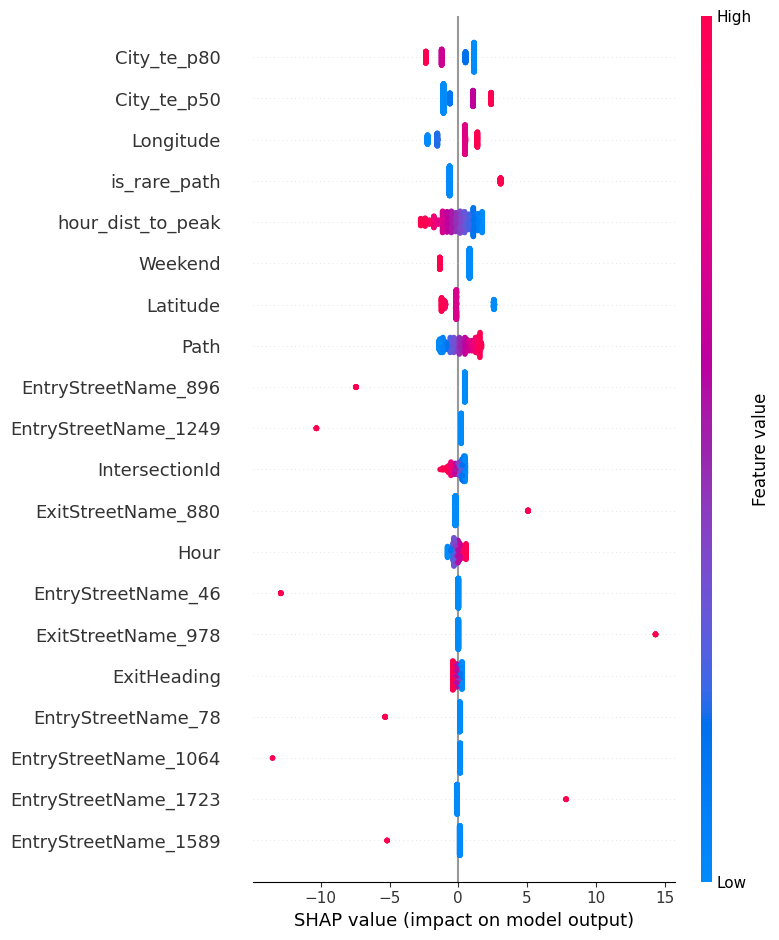

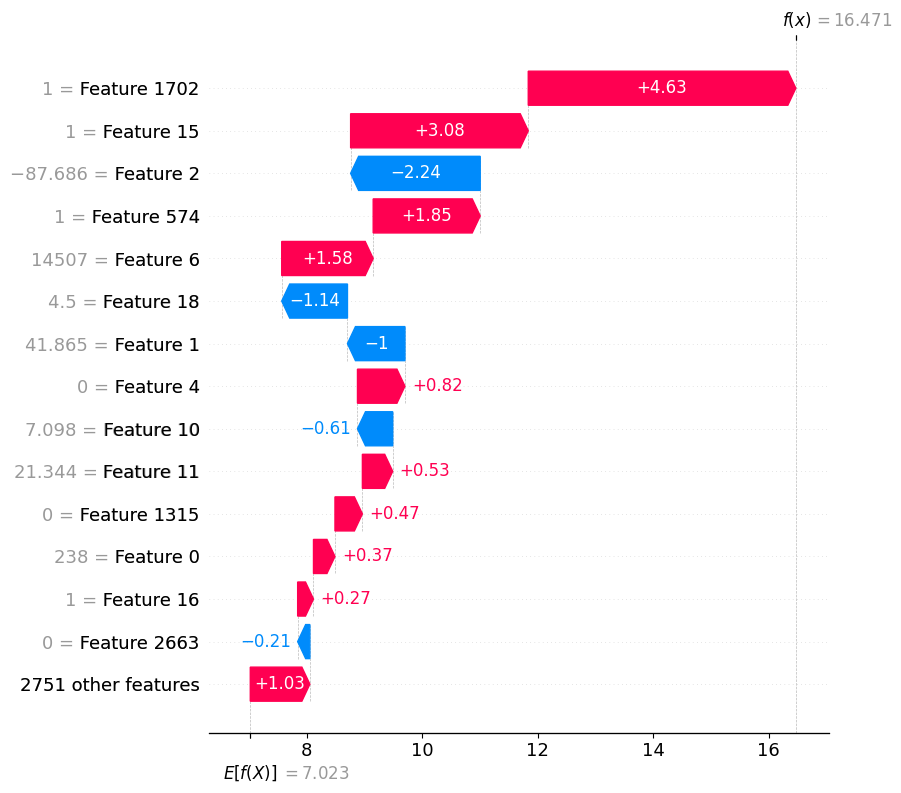

,f,mean_abs,mean
16,n_rare_components,0.247291,-0.007772
4,Weekend,0.243584,0.052349
3,Hour,0.199850,-0.044356
15,is_rare_path,0.178278,-0.003184
18,hour_dist_to_peak,0.177843,-0.025816
1,Latitude,0.161724,0.001011
11,City_te_p80,0.141502,0.006097
0,IntersectionId,0.093040,0.001751
10,City_te_p50,0.074775,0.008856
9,City_te_p20,0.073457,0.002969


/tmp/ipython-input-2318043328.py:92: FutureWarning:

The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.



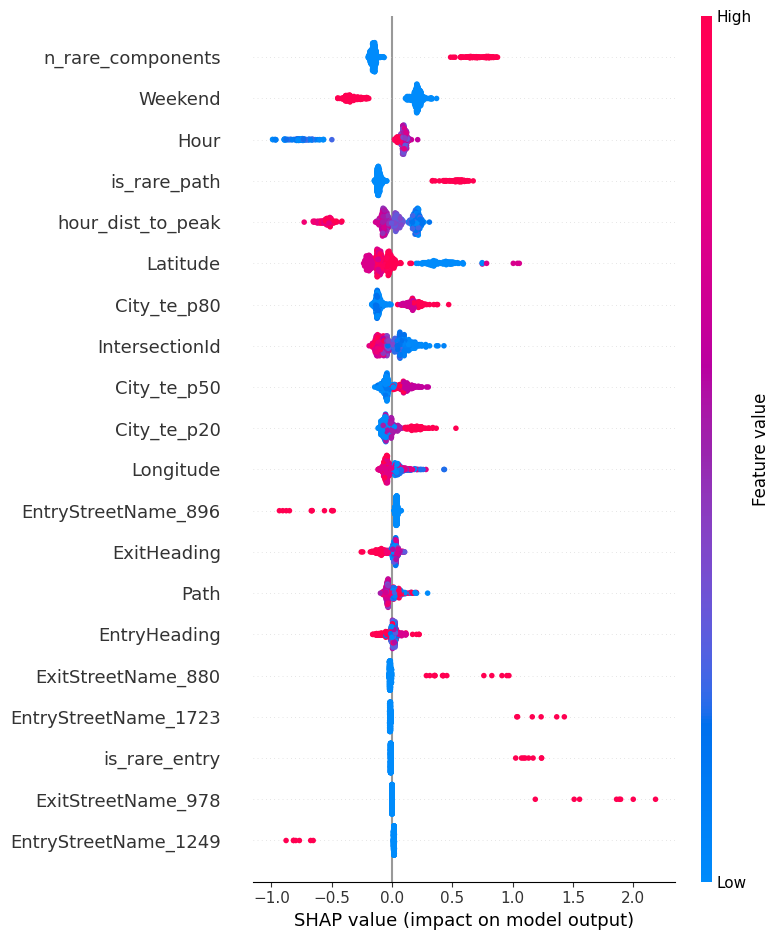

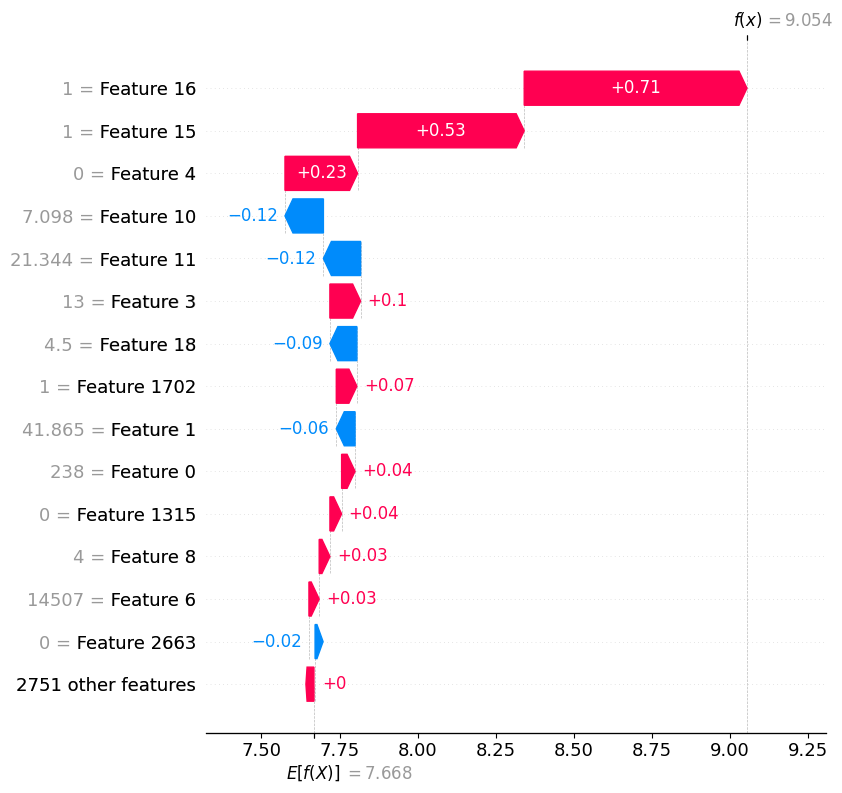

common_top 16 ['City_te_p80', 'City_te_p50', 'Longitude', 'is_rare_path', 'hour_dist_to_peak', 'Weekend', 'Latitude', 'Path', 'EntryStreetName_896', 'EntryStreetName_1249']


,ridge_mean,rf_mean,same_sign
f,,,
City_te_p80,-0.114834,0.006097,False
Longitude,-0.082249,0.000058,False
Latitude,-0.056116,0.001011,False
IntersectionId,-0.007677,0.001751,False
ExitStreetName_880,-0.063413,0.001033,False
City_te_p50,0.102307,0.008856,True
is_rare_path,-0.022238,-0.003184,True
hour_dist_to_peak,-0.062515,-0.025816,True
Weekend,0.199038,0.052349,True


LIME Ridge [('ExitStreetName_94 <= 0.00', -16.972134316044503), ('ExitStreetName_590 <= 0.00', -15.418817278604047), ('ExitStreetName_978 <= 0.00', -15.2171551323704), ('EntryStreetName_46 <= 0.00', 13.087650499047166), ('EntryStreetName_1051 <= 0.00', 13.085135262161705), ('ExitStreetName_1042 <= 0.00', -12.829998974711573), ('EntryStreetName_1064 <= 0.00', 12.819705533220645), ('EntryStreetName_1598 <= 0.00', 12.676145803605786), ('EntryStreetName_1568 <= 0.00', -12.199862645527645), ('EntryStreetName_233 <= 0.00', -11.934197822169), ('EntryStreetName_295 <= 0.00', -11.523972478546387), ('EntryStreetName_1249 <= 0.00', 9.610258179913608), ('EntryStreetName_130 <= 0.00', -9.176215310418172), ('EntryStreetName_1037 <= 0.00', 7.776556469159666), ('ExitStreetName_1449 <= 0.00', -6.875155396990568)]
LIME RF [('EntryStreetName_295 <= 0.00', -1.7418475891214404), ('ExitStreetName_978 <= 0.00', -1.4935748119240597), ('EntryStreetName_215 <= 0.00', 1.2646506201582206), ('EntryStreetName_1723 

,f,score,mean_w
83,EntryStreetName_1064,11.698426,-11.092264
72,EntryStreetName_1051,10.634002,-10.634002
2714,ExitStreetName_94,10.451897,10.451897
2744,ExitStreetName_978,9.312029,9.312029
1448,ExitStreetName_1042,8.388135,8.388135
899,EntryStreetName_46,7.959498,-7.959498
516,EntryStreetName_1568,4.412301,4.412301
2381,ExitStreetName_590,4.278965,4.243449
541,EntryStreetName_1598,4.191700,-4.191700
299,EntryStreetName_130,3.942698,3.923655


5 / 20
10 / 20
15 / 20
20 / 20


,f,score,mean_w
2744,ExitStreetName_978,0.683910,0.683910
763,EntryStreetName_295,0.310605,0.310605
2381,ExitStreetName_590,0.128121,0.128121
715,EntryStreetName_233,0.116516,0.116516
698,EntryStreetName_215,0.112310,-0.112310
1152,EntryStreetName_73,0.101452,0.080255
659,EntryStreetName_1723,0.095713,0.095713
1245,EntryStreetName_83,0.092398,0.092398
1158,EntryStreetName_735,0.084460,0.084460
886,EntryStreetName_444,0.076232,0.076232


In [ ]:
import numpy as np,pandas as pd,shap
from lime.lime_tabular import LimeTabularExplainer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from IPython.display import display

X_train_s1=X_train.copy()
X_val_s1=X_val.copy()

def pick_p50(y):
    if isinstance(y,pd.DataFrame):
        if "TotalTimeStopped_p50" in y.columns:
            return y["TotalTimeStopped_p50"]
        return y.iloc[:,1] if y.shape[1]>1 else y.iloc[:,0]
    if isinstance(y,pd.Series):
        return y
    a=np.asarray(y)
    if a.ndim==2:
        j=1 if a.shape[1]>1 else 0
        return pd.Series(a[:,j])
    return pd.Series(a)

y_train_s1=pick_p50(y_train)
y_val_s1=pick_p50(y_val)

n_tr=50000
if len(X_train_s1)>n_tr:
    X_train_s1=X_train_s1.sample(n_tr,random_state=42)
    y_train_s1=y_train_s1.loc[X_train_s1.index]

cat_cols=[c for c in X_train_s1.columns if X_train_s1[c].dtype=="object"]
num_cols=[c for c in X_train_s1.columns if c not in cat_cols]

if len(cat_cols)>0:
    pre=ColumnTransformer([
        ("num",SimpleImputer(strategy="median"),num_cols),
        ("cat",Pipeline([("im",SimpleImputer(strategy="most_frequent")),("oh",OneHotEncoder(handle_unknown="ignore"))]),cat_cols)
    ])
else:
    pre=ColumnTransformer([("num",SimpleImputer(strategy="median"),num_cols)])

Xt_train=pre.fit_transform(X_train_s1)
Xt_val=pre.transform(X_val_s1)

fn_num=num_cols
fn_cat=[]
if len(cat_cols)>0:
    fn_cat=pre.named_transformers_["cat"].named_steps["oh"].get_feature_names_out(cat_cols).tolist()
fn=fn_num+fn_cat

ridge=Ridge(alpha=1.0,random_state=42)
ridge.fit(Xt_train,y_train_s1)
p=ridge.predict(Xt_val)
print("Ridge MAE",mean_absolute_error(y_val_s1,p))

rf=RandomForestRegressor(
    n_estimators=80,
    max_depth=14,
    min_samples_leaf=20,
    max_features="sqrt",
    bootstrap=True,
    max_samples=0.5,
    n_jobs=-1,
    random_state=42
)
rf.fit(Xt_train,y_train_s1)
p=rf.predict(Xt_val)
print("RF MAE",mean_absolute_error(y_val_s1,p))

def tod(x):
    return x.toarray() if hasattr(x,"toarray") else np.asarray(x)

bg=tod(Xt_train[:500])
val=tod(Xt_val[:500])

e1=shap.LinearExplainer(ridge,bg)
sv1=e1(val)
imp1=pd.DataFrame({"f":fn,"mean_abs":np.abs(sv1.values).mean(0),"mean":sv1.values.mean(0)}).sort_values("mean_abs",ascending=False)
display(imp1.head(20))
shap.summary_plot(sv1,val,feature_names=fn)
shap.plots.waterfall(sv1[0],max_display=15)

e2=shap.TreeExplainer(rf,bg)
sv2=e2(val)
imp2=pd.DataFrame({"f":fn,"mean_abs":np.abs(sv2.values).mean(0),"mean":sv2.values.mean(0)}).sort_values("mean_abs",ascending=False)
display(imp2.head(20))
shap.summary_plot(sv2,val,feature_names=fn)
shap.plots.waterfall(sv2[0],max_display=15)

top=20
t1=imp1.set_index("f")
t2=imp2.set_index("f")
common=t1.head(top).index.intersection(t2.head(top).index)
print("common_top",len(common),list(common)[:10])
cmp=pd.DataFrame(index=common)
cmp["ridge_mean"]=t1.loc[common,"mean"]
cmp["rf_mean"]=t2.loc[common,"mean"]
cmp["same_sign"]=(np.sign(cmp["ridge_mean"])==np.sign(cmp["rf_mean"]))
display(cmp.sort_values("same_sign"))

lime=LimeTabularExplainer(bg,feature_names=fn,mode="regression")
i=0
ex_ridge=lime.explain_instance(val[i],ridge.predict,num_features=15)
ex_rf=lime.explain_instance(val[i],rf.predict,num_features=15)
print("LIME Ridge",ex_ridge.as_list())
print("LIME RF",ex_rf.as_list())

def lime_global(explainer,model,Xd,n=40,k=12,num_samples=1000,seed=42,log_every=10):
    rs=np.random.RandomState(seed)
    idx=rs.choice(len(Xd),size=min(n,len(Xd)),replace=False)
    w=np.zeros(Xd.shape[1])
    s=np.zeros(Xd.shape[1])
    for t,j in enumerate(idx,1):
        ex=explainer.explain_instance(Xd[j],model.predict,num_features=k,num_samples=num_samples)
        pairs=list(ex.local_exp.values())[0]
        for fi,wi in pairs:
            w[fi]+=abs(wi)
            s[fi]+=wi
        if log_every and t%log_every==0:
            print(t,"/",len(idx))
    return pd.DataFrame({"f":fn,"score":w/len(idx),"mean_w":s/len(idx)}).sort_values("score",ascending=False)


display(lime_global(lime,ridge,val,n=40,k=12,num_samples=1000,log_every=10).head(20))
display(lime_global(lime,rf,val,n=20,k=12,num_samples=800,log_every=5).head(20))

### Выводы по Шагу 1

**Модели и качество.** Для целевой `TotalTimeStopped_p50` сравнили 2 разных класса моделей: линейную `Ridge` и ансамблевую `RandomForest`. По MAE лучше оказалась линейная модель: **Ridge MAE = 9.37**, **RF MAE = 10.28**.

**Глобальная интерпретация (SHAP).** По `mean(|SHAP|)` у Ridge наиболее влиятельные признаки:
`City_te_p80`, `City_te_p50`, `Longitude`, `is_rare_path`, `hour_dist_to_peak`, `Weekend`, `Latitude`, `Path` + отдельные OHE-улицы (`EntryStreetName_*`, `ExitStreetName_*`).
У RF картина похожая по “ядру” (например, `Weekend`, `Hour`, `is_rare_path`, `hour_dist_to_peak`, координаты), но появляется дополнительный важный признак **`n_rare_components`**.

**Сравнение влияний между моделями.** Пересечение топ-признаков большое (**common_top = 17**), то есть модели в целом “смотрят” на одни и те же факторы. При этом **знак влияния** для части признаков отличается (например, `City_te_p80`, `Longitude`, `Latitude`, `IntersectionId`, `ExitStreetName_880`), что ожидаемо: линейная модель фиксирует один “средний” эффект, а ансамбль может учитывать нелинейности/взаимодействия и давать другое среднее направление.

**Локальная интерпретация (один объект).**

* SHAP waterfall показывает, какие конкретные фичи подняли/опустили прогноз для выбранного наблюдения.
* LIME для Ridge и RF также выделяет набор решающих признаков; заметно, что в локальных объяснениях часто доминируют редкие OHE-признаки улиц (модель реагирует на конкретные `EntryStreetName_*` / `ExitStreetName_*`).

**Про ускорение/сокращение размеров.** Чтобы уложиться по времени, интерпретации считались **на подвыборках**: ограничили размер обучающей части для интерпретации, использовали **меньший background и val** для SHAP (порядка сотен точек), а для “глобального LIME” уменьшили число объясняемых объектов и число синтетических сэмплов (`num_samples`). Это ускоряет расчёты, при этом логика сравнения моделей и ключевых факторов сохраняется.


##3.2


Данные и split без конфликта с командой

In [ ]:
import numpy as np,pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from catboost import CatBoostRegressor,Pool

ycol_s2="TotalTimeStopped_p50"
feats_s2=final_features.copy()
df_s2=df.copy()

d_s2=df_s2.dropna(subset=[ycol_s2]).copy()
X_all_s2=d_s2[feats_s2]
y_all_s2=d_s2[ycol_s2]

use_team_split=("X_train" in globals() and "X_val" in globals() and isinstance(X_train,pd.DataFrame) and set(feats_s2).issubset(set(X_train.columns)))
if use_team_split:
    Xtr_s2=X_train[feats_s2].copy()
    Xva_s2=X_val[feats_s2].copy()
    ytr_s2=d_s2.loc[Xtr_s2.index,ycol_s2]
    yva_s2=d_s2.loc[Xva_s2.index,ycol_s2]
else:
    Xtr_s2,Xva_s2,ytr_s2,yva_s2=train_test_split(X_all_s2,y_all_s2,test_size=0.2,random_state=42)

cat_cols_s2=[c for c in Xtr_s2.columns if Xtr_s2[c].dtype=="object"]
cat_idx_s2=[Xtr_s2.columns.get_loc(c) for c in cat_cols_s2]

Функции: модель + SHAP-эмбеддинги (для будущего Shapley Flow)

In [ ]:
def fit_cb_s2(Xtr,ytr,Xva,yva,cat_idx,task_type="CPU"):
    m=CatBoostRegressor(
        iterations=600,
        learning_rate=0.05,
        depth=6,
        loss_function="MAE",
        eval_metric="MAE",
        random_seed=42,
        verbose=200,
        early_stopping_rounds=50,
        task_type=task_type
    )
    m.fit(Pool(Xtr,ytr,cat_features=cat_idx),eval_set=Pool(Xva,yva,cat_features=cat_idx),use_best_model=True)
    return m

def pred_cb_s2(m,X,cat_idx):
    return m.predict(Pool(X,cat_features=cat_idx))

def shap_embed_s2(m,X,cat_idx,n_max=20000,seed=42):
    if n_max is not None and len(X)>n_max:
        rs=np.random.RandomState(seed)
        idx=rs.choice(len(X),size=n_max,replace=False)
        Xs=X.iloc[idx]
    else:
        idx=None
        Xs=X
    sv=m.get_feature_importance(Pool(Xs,cat_features=cat_idx),type="ShapValues")
    sv=np.asarray(sv)
    emb=sv[:,:-1]
    base=sv[:,-1]
    return emb,base,idx

Бейзлайн до (метрика)

In [ ]:
m0_s2=fit_cb_s2(Xtr_s2,ytr_s2,Xva_s2,yva_s2,cat_idx_s2,task_type="CPU")
p0_s2=pred_cb_s2(m0_s2,Xva_s2,cat_idx_s2)
mae0_s2=mean_absolute_error(yva_s2,p0_s2)
print("MAE_before",mae0_s2)


0:	learn: 7.6750143	test: 7.6861020	best: 7.6861020 (0)	total: 275ms	remaining: 2m 44s
200:	learn: 7.2519822	test: 7.2267581	best: 7.2267581 (200)	total: 35.2s	remaining: 1m 9s
400:	learn: 7.2395681	test: 7.2134181	best: 7.2134169 (399)	total: 1m 3s	remaining: 31.6s
599:	learn: 7.2308985	test: 7.2043534	best: 7.2043534 (599)	total: 1m 30s	remaining: 0us

bestTest = 7.204353419
bestIteration = 599

MAE_before 7.204354101345581


SHAP-эмбеддинги + сдвиги (train vs val)

In [ ]:
emb_tr_s2,base_tr_s2,idx_tr_s2=shap_embed_s2(m0_s2,Xtr_s2,cat_idx_s2,n_max=20000,seed=42)
emb_va_s2,base_va_s2,idx_va_s2=shap_embed_s2(m0_s2,Xva_s2,cat_idx_s2,n_max=20000,seed=42)

fn_s2=list(Xtr_s2.columns)
imp_tr_s2=np.abs(emb_tr_s2).mean(0)
imp_va_s2=np.abs(emb_va_s2).mean(0)
shift_s2=pd.DataFrame({"feature":fn_s2,"abs_shap_train":imp_tr_s2,"abs_shap_val":imp_va_s2})
shift_s2["diff"]=shift_s2["abs_shap_val"]-shift_s2["abs_shap_train"]
shift_s2=shift_s2.sort_values("diff",ascending=False)

display(shift_s2.head(20))
display(shift_s2.tail(20))


,feature,abs_shap_train,abs_shap_val,diff
4,Weekend,0.351305,0.355735,0.004430
0,IntersectionId,0.088288,0.089928,0.001639
3,Hour,0.502266,0.503379,0.001113
1,Latitude,0.090475,0.091502,0.001027
11,City_te_p20,0.005884,0.006229,0.000345
9,EntryHeading,0.017392,0.017724,0.000332
16,is_rare_exit,0.006045,0.006371,0.000326
20,hour_dist_to_peak,0.096532,0.096834,0.000301
13,City_te_p80,0.013598,0.013807,0.000209
10,ExitHeading,0.006346,0.006527,0.000181


,feature,abs_shap_train,abs_shap_val,diff
3,Hour,0.502266,0.503379,0.001113
1,Latitude,0.090475,0.091502,0.001027
11,City_te_p20,0.005884,0.006229,0.000345
9,EntryHeading,0.017392,0.017724,0.000332
16,is_rare_exit,0.006045,0.006371,0.000326
20,hour_dist_to_peak,0.096532,0.096834,0.000301
13,City_te_p80,0.013598,0.013807,0.000209
10,ExitHeading,0.006346,0.006527,0.000181
12,City_te_p50,0.005376,0.005496,0.000120
5,Month,0.001705,0.001712,0.000007


Аномалии по SHAP-эмбеддингам → чистка → переобучение → сравнение метрик

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

def shap_anom_mask_s2(emb,cont=0.02,seed=42):
    iso=IsolationForest(n_estimators=300,contamination=cont,random_state=seed,n_jobs=-1)
    a1=(iso.fit_predict(emb)==-1)
    lof=LocalOutlierFactor(n_neighbors=35,contamination=cont,n_jobs=-1)
    a2=(lof.fit_predict(emb)==-1)
    return (a1|a2)

anom_tr_s2=shap_anom_mask_s2(emb_tr_s2,cont=0.02,seed=42)
print("train_anom_rate",anom_tr_s2.mean())

Xtr_emb_s2=Xtr_s2 if idx_tr_s2 is None else Xtr_s2.iloc[idx_tr_s2]
ytr_emb_s2=ytr_s2 if idx_tr_s2 is None else ytr_s2.iloc[idx_tr_s2]

keep_s2=~anom_tr_s2
Xtr_clean_s2=Xtr_emb_s2.iloc[keep_s2]
ytr_clean_s2=ytr_emb_s2.iloc[keep_s2]

m1_s2=fit_cb_s2(Xtr_clean_s2,ytr_clean_s2,Xva_s2,yva_s2,cat_idx_s2,task_type="CPU")
p1_s2=pred_cb_s2(m1_s2,Xva_s2,cat_idx_s2)
mae1_s2=mean_absolute_error(yva_s2,p1_s2)
print("MAE_after_clean",mae1_s2,"delta",mae1_s2-mae0_s2)


train_anom_rate 0.03965
0:	learn: 7.2751184	test: 7.6869989	best: 7.6869989 (0)	total: 20.2ms	remaining: 12.1s
200:	learn: 7.2223557	test: 7.6746336	best: 7.6743203 (162)	total: 2.86s	remaining: 5.67s
400:	learn: 6.9707538	test: 7.4636041	best: 7.4636041 (400)	total: 4.6s	remaining: 2.28s
599:	learn: 6.7769673	test: 7.3053296	best: 7.3053296 (599)	total: 6.47s	remaining: 0us

bestTest = 7.305329617
bestIteration = 599

MAE_after_clean 7.305330429736899 delta 0.10097632839131787


Удалили/отфильтровали найденные аномальные наблюдения и переобучили модель. Качество ухудшилось: MAE_after_clean = 7.305, изменение ΔMAE = +0.101 ⇒ очистка по этому критерию не дала улучшения.

Кластеризация SHAP-эмбеддингов (PCA + KMeans/Hier/DBSCAN)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
from sklearn.metrics import silhouette_score

Z_va_s2=PCA(n_components=20,random_state=42).fit_transform(emb_va_s2)

km_s2=KMeans(n_clusters=6,random_state=42,n_init=20)
lab_km_s2=km_s2.fit_predict(Z_va_s2)
print("kmeans_sil",silhouette_score(Z_va_s2,lab_km_s2))

ag_s2=AgglomerativeClustering(n_clusters=6)
lab_ag_s2=ag_s2.fit_predict(Z_va_s2)
print("agg_sil",silhouette_score(Z_va_s2,lab_ag_s2))

db_s2=DBSCAN(eps=1.2,min_samples=40)
lab_db_s2=db_s2.fit_predict(Z_va_s2)
k_db=len(set(lab_db_s2))-(1 if -1 in lab_db_s2 else 0)
print("dbscan_clusters",k_db,"noise_rate",(lab_db_s2==-1).mean())


kmeans_sil 0.40382727581737926
agg_sil 0.5488446903991697
dbscan_clusters 12 noise_rate 0.02775


Интерпретация кластеров + добавление cluster в датасет + переобучение

In [ ]:
emb_tr2_s2,_,_=shap_embed_s2(m0_s2,Xtr_s2,cat_idx_s2,n_max=20000,seed=42)
pca2_s2=PCA(n_components=20,random_state=42)
Ztr2_s2=pca2_s2.fit_transform(emb_tr2_s2)

km2_s2=KMeans(n_clusters=6,random_state=42,n_init=20)
lab_tr2_s2=km2_s2.fit_predict(Ztr2_s2)

Zva2_s2=pca2_s2.transform(emb_va_s2)
lab_va2_s2=km2_s2.predict(Zva2_s2)

Xtr_cl_s2=(Xtr_s2 if idx_tr_s2 is None else Xtr_s2.iloc[idx_tr_s2]).copy()
Xva_cl_s2=(Xva_s2 if idx_va_s2 is None else Xva_s2.iloc[idx_va_s2]).copy()
ytr_cl_s2=(ytr_s2 if idx_tr_s2 is None else ytr_s2.iloc[idx_tr_s2])
yva_cl_s2=(yva_s2 if idx_va_s2 is None else yva_s2.iloc[idx_va_s2])

Xtr_cl_s2["cluster"]=lab_tr2_s2.astype(str)
Xva_cl_s2["cluster"]=lab_va2_s2.astype(str)

cat_cols2_s2=[c for c in Xtr_cl_s2.columns if Xtr_cl_s2[c].dtype=="object"]
cat_idx2_s2=[Xtr_cl_s2.columns.get_loc(c) for c in cat_cols2_s2]

m2_s2=fit_cb_s2(Xtr_cl_s2,ytr_cl_s2,Xva_cl_s2,yva_cl_s2,cat_idx2_s2,task_type="CPU")
p2_s2=pred_cb_s2(m2_s2,Xva_cl_s2,cat_idx2_s2)
mae2_s2=mean_absolute_error(yva_cl_s2,p2_s2)
print("MAE_with_cluster",mae2_s2)

0:	learn: 7.5546874	test: 7.7493624	best: 7.7493624 (0)	total: 11.9ms	remaining: 7.1s
200:	learn: 6.9518418	test: 7.2847180	best: 7.2847180 (200)	total: 2.58s	remaining: 5.11s
400:	learn: 6.7843584	test: 7.2465034	best: 7.2465034 (400)	total: 4.76s	remaining: 2.36s
599:	learn: 6.6837418	test: 7.2346920	best: 7.2337891 (563)	total: 7.05s	remaining: 0us

bestTest = 7.233789099
bestIteration = 563

Shrink model to first 564 iterations.
MAE_with_cluster 7.233789848345294


Добавили номер кластера как новый признак и переобучили модель. Результат: MAE_with_cluster = 7.234 — лучше, чем после очистки (7.305), но хуже бейзлайна (7.204). Существенного прироста нет.

Короткая интерпретация кластеров по SHAP-профилю:

In [ ]:
def cluster_profile_s2(emb,labels,y,fn,top=8):
    rows=[]
    for c in np.unique(labels):
        m=(labels==c)
        if m.sum()<50:
            continue
        imp=np.abs(emb[m]).mean(0)
        j=np.argsort(-imp)[:top]
        rows.append([int(c),int(m.sum()),float(np.mean(y[m]))]+[fn[k] for k in j])
    cols=["cluster","n","y_mean"]+[f"top_{i+1}" for i in range(top)]
    return pd.DataFrame(rows,columns=cols).sort_values("n",ascending=False)

display(cluster_profile_s2(emb_va_s2,lab_va2_s2,yva_cl_s2.values,fn_s2,top=10))

,cluster,n,y_mean,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10
0,0,11715,6.311310,EntryStreetName,Hour,is_rare_path,Weekend,n_rare_components,Longitude,Latitude,hour_dist_to_peak,IntersectionId,City_te_p80
5,5,5400,5.752222,EntryStreetName,Hour,Weekend,is_rare_path,hour_dist_to_peak,IntersectionId,Longitude,n_rare_components,Latitude,EntryHeading
3,3,1343,13.082651,EntryStreetName,Hour,Weekend,is_rare_path,hour_dist_to_peak,Latitude,IntersectionId,n_rare_components,Longitude,EntryHeading
2,2,715,17.521678,EntryStreetName,Hour,Weekend,is_rare_path,hour_dist_to_peak,Latitude,IntersectionId,n_rare_components,Longitude,EntryHeading
1,1,520,20.442308,EntryStreetName,Hour,Weekend,hour_dist_to_peak,Latitude,IntersectionId,is_rare_path,Longitude,n_rare_components,EntryHeading
4,4,307,32.420195,EntryStreetName,Hour,Weekend,hour_dist_to_peak,Latitude,IntersectionId,n_rare_components,Longitude,is_rare_path,EntryHeading


Кластеры различаются по среднему уровню целевой переменной (y_mean растёт от ~6.31 до ~32.42) и по доминирующим факторам влияния; чаще всего ключевые признаки внутри кластеров: EntryStreetName, Hour, Weekend, is_rare_path, hour_dist_to_peak, координаты и IntersectionId.


### Выводы по Шагу 2
SHAP-эмбеддинги показали, что распределение вкладов признаков на train и val в целом стабильное (существенного дрейфа по `mean(|SHAP|)` не выявлено). Доля наблюдений с атипичным SHAP-профилем составила ~**4%**. Очистка этих наблюдений ухудшила качество (**MAE 7.204 → 7.305**), поэтому удаление по данному критерию нецелесообразно. Кластеризация SHAP-эмбеддингов выявила осмысленную сегментацию (лучший силуэт у agglomerative), однако добавление признака “cluster” дало лишь умеренный эффект и не превзошло бейзлайн (**MAE_with_cluster = 7.234**).


##3.3

###3.3.1 Кросс-валидация: SHAP-эмбеддинги vs SHAP+исходные фичи

In [ ]:
import numpy as np,pandas as pd
from catboost import CatBoostRegressor,Pool
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from scipy import sparse

def pick_p50(y):
    if isinstance(y,pd.DataFrame):
        if "TotalTimeStopped_p50" in y.columns:return y["TotalTimeStopped_p50"]
        return y.iloc[:,1] if y.shape[1]>1 else y.iloc[:,0]
    if isinstance(y,pd.Series):return y
    a=np.asarray(y)
    if a.ndim==2:
        j=1 if a.shape[1]>1 else 0
        return pd.Series(a[:,j])
    return pd.Series(a)

def cat_idx_from_df(X):
    return [X.columns.get_loc(c) for c in X.columns if X[c].dtype=="object"]

def prep_ohe(X):
    cat_cols=[c for c in X.columns if X[c].dtype=="object"]
    num_cols=[c for c in X.columns if c not in cat_cols]
    if len(cat_cols)>0:
        return ColumnTransformer([
            ("num",SimpleImputer(strategy="median"),num_cols),
            ("cat",Pipeline([("im",SimpleImputer(strategy="most_frequent")),
                             ("oh",OneHotEncoder(handle_unknown="ignore"))]),cat_cols)
        ])
    return ColumnTransformer([("num",SimpleImputer(strategy="median"),num_cols)])

def shap_embed_catboost(m,X,cat_idx):
    sv=m.get_feature_importance(Pool(X,cat_features=cat_idx),type="ShapValues")
    sv=np.asarray(sv)
    return sv[:,:-1]

y_col="TotalTimeStopped_p50"
use_cols=final_features if "final_features" in globals() else feature_cols
d=df.dropna(subset=[y_col]).copy()
X=d[use_cols].copy()
y=pick_p50(d[[y_col]] if y_col in d.columns else d[y_col])

for c in X.columns:
    if X[c].dtype=="object":
        X[c]=X[c].fillna("MISSING").astype(str)

kf=KFold(n_splits=3,shuffle=True,random_state=42)

mae_base=[]
mae_emb=[]
mae_cat=[]

for tr,va in kf.split(X):
    Xtr,Xva=X.iloc[tr].copy(),X.iloc[va].copy()
    ytr,yva=y.iloc[tr].copy(),y.iloc[va].copy()

    ci=cat_idx_from_df(Xtr)

    m=CatBoostRegressor(
        iterations=400,
        learning_rate=0.1,
        depth=6,
        loss_function="MAE",
        eval_metric="MAE",
        random_seed=42,
        verbose=False
    )

    m.fit(Pool(Xtr,ytr,cat_features=ci),
          eval_set=Pool(Xva,yva,cat_features=ci),
          use_best_model=True)

    mae_base.append(mean_absolute_error(yva,m.predict(Xva)))

    n_sh=3000
    if len(Xtr)>n_sh:
        idx_tr=np.random.RandomState(42).choice(len(Xtr),n_sh,replace=False)
        Xtr_sh=Xtr.iloc[idx_tr]
        ytr_sh=ytr.iloc[idx_tr]
    else:
        Xtr_sh=Xtr
        ytr_sh=ytr

    if len(Xva)>n_sh:
        idx_va=np.random.RandomState(43).choice(len(Xva),n_sh,replace=False)
        Xva_sh=Xva.iloc[idx_va]
        yva_sh=yva.iloc[idx_va]
    else:
        Xva_sh=Xva
        yva_sh=yva

    sv_tr=shap_embed_catboost(m,Xtr_sh,ci)
    sv_va=shap_embed_catboost(m,Xva_sh,ci)

    r1=Ridge(alpha=1.0,random_state=42)
    r1.fit(sv_tr,ytr_sh)
    mae_emb.append(mean_absolute_error(yva_sh,r1.predict(sv_va)))

    pre=prep_ohe(Xtr_sh)
    Xt_tr=pre.fit_transform(Xtr_sh)
    Xt_va=pre.transform(Xva_sh)

    Xt_tr2=sparse.hstack([Xt_tr,sparse.csr_matrix(sv_tr)],format="csr")
    Xt_va2=sparse.hstack([Xt_va,sparse.csr_matrix(sv_va)],format="csr")

    r2=Ridge(alpha=1.0,random_state=42)
    r2.fit(Xt_tr2,ytr_sh)
    mae_cat.append(mean_absolute_error(yva_sh,r2.predict(Xt_va2)))

print("CV(3) MAE base(CatBoost):",float(np.mean(mae_base)),"±",float(np.std(mae_base)))
print("CV(3) MAE SHAP only(Ridge):",float(np.mean(mae_emb)),"±",float(np.std(mae_emb)))
print("CV(3) MAE X+SHAP(Ridge):",float(np.mean(mae_cat)),"±",float(np.std(mae_cat)))

CV(3) MAE base(CatBoost): 6.7922249293298265 ± 0.3056707643546213
CV(3) MAE SHAP only(Ridge): 9.047121048813763 ± 0.4102225665676317
CV(3) MAE X+SHAP(Ridge): 9.371337000247069 ± 0.40981539058601185


Сравнение вариантов (CV, 3 фолда):

Только SHAP-эмбеддинги (Ridge на SHAP): MAE = 9.05 ± 0.41

Конкатенация исходных признаков и SHAP (Ridge на [X+SHAP]): MAE = 9.37 ± 0.41

Вывод: добавление исходных признаков к SHAP-эмбеддингам в линейной модели не улучшило качество, а ухудшило его примерно на 0.32 MAE. В обоих вариантах качество существенно хуже, чем у исходной модели CatBoost (MAE = 6.79 ± 0.31), поэтому SHAP-эмбеддинги в нашем случае полезнее как инструмент диагностики/сдвигов и сегментации, а не как самостоятельное представление для обучения простой модели.